In [127]:
import pandas as pd
import os
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import KFold, cross_val_score

from sklearn.cluster import KMeans
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

cwd=os.getcwd()

#hide
cwd=os.getcwd()
folda=cwd+"/data/epl/"
dira = os.listdir(folda)
dira


['dfEPL_2017.csv',
 'dfEPL_2018.csv',
 'dfEPL_2019.csv',
 'dfEPL_2020.csv',
 'dfEPL_2021.csv',
 'epl2017-2021.csv',
 'epl2017-2021_wivnetscore.csv',
 'epl2017-2021_wivnetscoreAndGFGA_both-HA.csv',
 'epl2017-2021_wivnetscore_both-HA.csv']

In [6]:
dict1={}
dict1['ok']=5
dict1['ps']=51

dict1.keys()
[x for x in dict1]

['ok', 'ps']

In [349]:
#collapse-output

dfAll=pd.read_csv(folda+'epl2017-2021_wivnetscoreAndGFGA_both-HA.csv')
dfAll=dfAll.iloc[20:,:]
dfAll=dfAll.drop(columns=['Unnamed: 0','opponent_y','team_y','Win_x','NetScore_x','GoalsAgainst_x'])
dfAll=dfAll.dropna().reset_index(drop=True)
dfAll

,round,day,venue_x,result_x,gf_x,ga_x,opponent_x,gls_x,sh_shooting_x,sot_x,...,crs_misc_y,int_misc_y,tklw_misc_y,pkwon_y,pkcon_y,og_y,recov_y,won_y,lost_y,won%_y
0,2,21,Home,2.000000,2.000000,0.000000,Everton,1.000000,14.000000,4.000000,...,12.000000,16.000000,9.000000,0.000000,0.000000,0.000000,101.000000,25.000000,26.000000,49.000000
1,2,20,Home,2.000000,2.000000,0.000000,Chelsea,2.000000,18.000000,6.000000,...,14.000000,9.000000,8.000000,0.000000,0.000000,0.000000,92.000000,21.000000,31.000000,40.400000
2,2,19,Home,0.000000,3.000000,3.000000,Crystal Palace,3.000000,13.000000,4.000000,...,13.000000,21.000000,13.000000,0.000000,0.000000,1.000000,100.000000,19.000000,19.000000,50.000000
3,2,20,Away,-1.000000,2.000000,3.000000,Tottenham Hotspur,2.000000,19.000000,6.000000,...,14.000000,17.000000,6.000000,0.000000,0.000000,0.000000,75.000000,21.000000,19.000000,52.500000
4,2,19,Away,1.000000,4.000000,3.000000,Stoke City,4.000000,27.000000,10.000000,...,9.000000,25.000000,12.000000,0.000000,0.000000,0.000000,91.000000,26.000000,25.000000,51.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3755,38,22,Away,0.333333,1.666667,1.333333,Arsenal,1.666667,9.333333,4.000000,...,11.666667,10.000000,9.666667,0.000000,0.000000,0.333333,74.333333,14.666667,16.666667,46.466667
3756,38,22,Away,-1.666667,0.666667,2.333333,Brentford,0.666667,9.666667,2.333333,...,19.333333,11.666667,6.666667,0.000000,0.666667,0.000000,80.333333,15.333333,15.666667,48.333333
3757,38,22,Home,-0.666667,1.000000,1.666667,Newcastle United,1.000000,13.000000,4.333333,...,11.000000,14.666667,13.000000,0.000000,0.000000,0.000000,64.333333,20.000000,19.000000,48.766667
3758,38,22,Away,-2.000000,0.666667,2.666667,Chelsea,0.333333,10.666667,2.666667,...,18.666667,11.666667,11.666667,0.333333,0.000000,0.000000,88.000000,17.666667,13.666667,57.066667


In [85]:
dfAll.select_dtypes(['O']).columns,X.select_dtypes(["category"])

(Index(['venue_x', 'opponent_x', 'team_x'], dtype='object'),
 Empty DataFrame
 Columns: []
 Index: [20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, ...]
 
 [3760 rows x 0 columns])

In [399]:
def impute(df):
    for name in df.select_dtypes("number"):
        df[name] = df[name].fillna(0)
    for name in df.select_dtypes("category"):
        df[name] = df[name].fillna("None")
    return df

dfAll=impute(dfAll)
X = dfAll.copy()
y = X.pop("GoalsFor_x")

In [112]:

def score_dataset(X, y, model=RandomForestRegressor()):
    # Label encoding for categoricals
    #
    # Label encoding is good for XGBoost and RandomForest, but one-hot
    # would be better for models like Lasso or Ridge. The `cat.codes`
    # attribute holds the category levels.
    for colname in X.select_dtypes(["O"]):
        X[colname] = X[colname].astype("category").cat.codes
    
    
    model.fit(X,y)
    score=model.score(X,y)
    
    return score

In [318]:
score_dataset(X, y)

# mean_absolute_error

0.8746216922762998

In [ ]:
# [(x,dfAll[x].isna().sum() ) for x in dfAll if dfAll[x].isna().sum()>0]

In [306]:
def make_mi_scores(X, y):
    mi_scores=[]
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

106


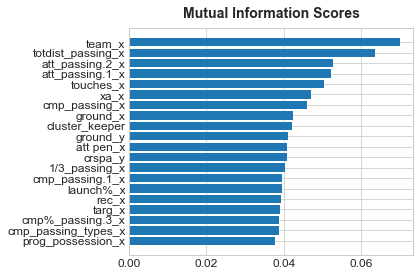

In [742]:
mi_scores = make_mi_scores(X, y)

plot_mi_scores(mi_scores[0:20])

print(sum(mi_scores==0))


In [431]:
from dtreeviz.trees import *
from fastbook import *
from kaggle import api
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

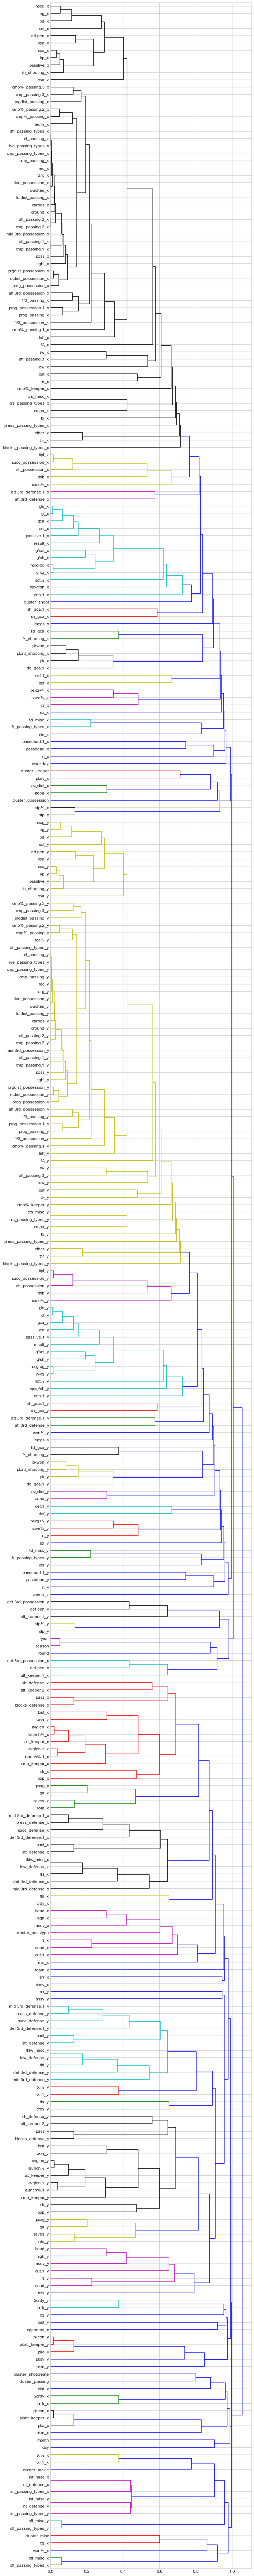

In [571]:
# cluster_columns(X)
X_=X.iloc[:,0:].copy()
corr = np.round(scipy.stats.spearmanr(X_).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
## hc.dendrogram(z, labels=df.columns, orientation='left', leaf_font_size=font_size)
# np.shape(X.columns),np.shape(z)


fig,axes = plt.subplots(1,1,figsize=(10,100))
# truncate_mode='lastp',p=30
hc.dendrogram(z,ax=axes, labels=X_.columns, show_contracted=True,
                    orientation='right', leaf_font_size=12);



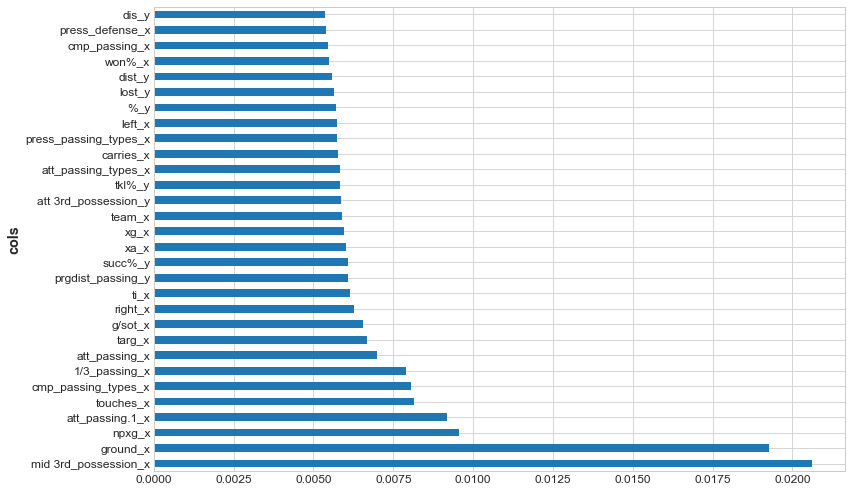

In [741]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=40, min_samples_leaf=15,
        max_samples=2_000, max_features=0.5, n_jobs=-1, oob_score=True)
    m.fit(df, y)
    return m.oob_score_
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)
fi = rf_feat_importance(m, X)
plot_fi(fi[:30]);

In [743]:
# plt.plot(fi.imp,mi_scores,'ok')

len(fi.imp), len(mi_scores)
mi_scores = mi_scores.reset_index()
mi_scores=mi_scores.merge(fi,left_on='index', right_on='cols')
mi_scores

,index,MI Scores,cols,imp
0,team_x,0.070002,team_x,0.005893
1,totdist_passing_x,0.063648,totdist_passing_x,0.001158
2,att_passing.2_x,0.052731,att_passing.2_x,0.004732
3,att_passing.1_x,0.052193,att_passing.1_x,0.009184
4,touches_x,0.050402,touches_x,0.008154
...,...,...,...,...
344,pksv_y,0.000000,pksv_y,0.000121
345,pkm_y,0.000000,pkm_y,0.000000
346,cmp_keeper_y,0.000000,cmp_keeper_y,0.001771
347,#opa_y,0.000000,#opa_y,0.001269


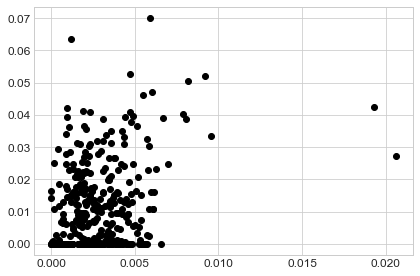

In [767]:
plt.plot(mi_scores.imp, mi_scores['MI Scores'],'ok')
to_keep = mi_scores[mi_scores.imp>0.001].cols
to_keep2 = mi_scores.loc[mi_scores['MI Scores']>0.00,'index']
Ximp=X.copy()

(0.3037249283667621, 0.15759312320916907)

In [798]:
Ximp=X.copy()
Ximp = Ximp[to_keep]
Ximp=X.copy()
Ximp2 = Ximp[to_keep2]

Ximp3 = Ximp[pd.concat([to_keep,to_keep2]).unique()]

rat3=1-len(Ximp3.columns)/len(X.columns) 
rat2=1-len(to_keep2)/len(X.columns) 
rat1=1-len(to_keep)/len(X.columns)

print(f"All: {get_oob(X):.3f},\
\nRemove low on RF {get_oob(Ximp):.3f},  {rat1:.2f}\
\nRemove low on MI scores =0: {get_oob(Ximp2):.3f},  {rat2:.2f}\
\nIn both: {get_oob(Ximp3):.3f},  {rat3:.2f}" )

# Ximp = Ximp[to_keep2]

All: 0.097,
Remove low on RF 0.094,  0.16
Remove low on MI scores =0: 0.105,  0.30
In both: 0.100,  0.08


In [801]:
0.3*len(X.columns)

104.7

In [593]:
def impute(df):
    for name in df.select_dtypes("number"):
        df[name] = df[name].fillna(0)
    for name in df.select_dtypes("category"):
        df[name] = df[name].fillna("None")
    for name in df.select_dtypes("O"):
        df[name] = df[name].fillna("None")
    return df

def catego(df):
    for x in df:
        if df[x].dtype=='O':
            df[x]=df[x].astype('category').cat.codes
    return df
def rf(xs, y, n_estimators=40, max_samples=2_000,
       max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [594]:
X=impute(X_)
X=catego(X)
m = rf(X,y)

C:\Users\44781\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


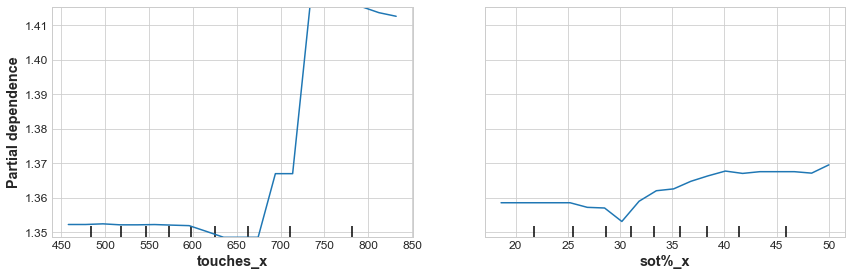

In [627]:
from sklearn.inspection import plot_partial_dependence

fig,ax = plt.subplots(figsize=(12, 4))
plot_partial_dependence(m, X, [mi_scores.index[3],X.columns[10]],
                        grid_resolution=20, ax=ax);

In [628]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

from treeinterpreter import treeinterpreter
from waterfall_chart import plot as waterfall

In [7]:
colNo=10
row = X.iloc[:1]

prediction,bias,contributions = treeinterpreter.predict(m, row.values)

# limitval=0.04

# boola = abs(contributions[0])>limitval
# cols_use = np.array(sorted(zip(abs(contributions[0]), X.columns), reverse=True)[:colNo])

def sort_index(lst, rev=True):
    index = range(len(lst))
    s = sorted(index, reverse=rev, key=lambda i: abs(lst[i]))
    return s

indas = sort_index(contributions[0], rev=True)

cont_use=contributions[0][indas[0:colNo]]
cols_use=X.columns[indas[0:colNo]]

waterfall(cols_use, cont_use, #threshold=0.08, 
          rotation_value=90,formatting='{:,.3f}');


NameError: name 'X' is not defined

In [711]:
[x for x in zip(contributions[0][0:4], X.columns[0:4])]

[(0.0, 'round'),
 (0.0, 'day'),
 (0.027085849626415467, 'venue_x'),
 (0.0, 'result_x')]

In [496]:
len(hcd['dcoord'])

11

In [390]:
mi_scores[['team_x',
'cluster_shoot',
'cluster_keeper',
'cluster_passing',
'cluster_passtype',
'cluster_shotcreate',
'cluster_tackle',
'cluster_possession']]#,
# 'cluster_misc']]

team_x                0.056959
cluster_shoot         0.024236
cluster_keeper        0.036972
cluster_passing       0.049058
cluster_passtype      0.036873
cluster_shotcreate    0.031788
cluster_tackle        0.031476
cluster_possession    0.038912
Name: MI Scores, dtype: float64

In [391]:
print(np.shape(X))
print(sum(mi_scores==0))
del_col = mi_scores[mi_scores==0].index
print(del_col[0:3].values)
X=X.drop(columns=del_col)
print(np.shape(X))

(3760, 191)
28
['tklw_misc_y' 'opp_y' 'succ_defense_x']
(3760, 163)


In [392]:
score_dataset(X, y)

# mean_absolute_error

0.8745083521817236

In [423]:
X

,round,day,venue_x,result_x,gf_x,ga_x,opponent_x,gls_x,sh_shooting_x,sot_x,...,crs_misc_y,int_misc_y,tklw_misc_y,pkwon_y,pkcon_y,og_y,recov_y,won_y,lost_y,won%_y
0,2,21,Home,2.000000,2.000000,0.000000,Everton,1.000000,14.000000,4.000000,...,12.000000,16.000000,9.000000,0.000000,0.000000,0.000000,101.000000,25.000000,26.000000,49.000000
1,2,20,Home,2.000000,2.000000,0.000000,Chelsea,2.000000,18.000000,6.000000,...,14.000000,9.000000,8.000000,0.000000,0.000000,0.000000,92.000000,21.000000,31.000000,40.400000
2,2,19,Home,0.000000,3.000000,3.000000,Crystal Palace,3.000000,13.000000,4.000000,...,13.000000,21.000000,13.000000,0.000000,0.000000,1.000000,100.000000,19.000000,19.000000,50.000000
3,2,20,Away,-1.000000,2.000000,3.000000,Tottenham Hotspur,2.000000,19.000000,6.000000,...,14.000000,17.000000,6.000000,0.000000,0.000000,0.000000,75.000000,21.000000,19.000000,52.500000
4,2,19,Away,1.000000,4.000000,3.000000,Stoke City,4.000000,27.000000,10.000000,...,9.000000,25.000000,12.000000,0.000000,0.000000,0.000000,91.000000,26.000000,25.000000,51.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3755,38,22,Away,0.333333,1.666667,1.333333,Arsenal,1.666667,9.333333,4.000000,...,11.666667,10.000000,9.666667,0.000000,0.000000,0.333333,74.333333,14.666667,16.666667,46.466667
3756,38,22,Away,-1.666667,0.666667,2.333333,Brentford,0.666667,9.666667,2.333333,...,19.333333,11.666667,6.666667,0.000000,0.666667,0.000000,80.333333,15.333333,15.666667,48.333333
3757,38,22,Home,-0.666667,1.000000,1.666667,Newcastle United,1.000000,13.000000,4.333333,...,11.000000,14.666667,13.000000,0.000000,0.000000,0.000000,64.333333,20.000000,19.000000,48.766667
3758,38,22,Away,-2.000000,0.666667,2.666667,Chelsea,0.333333,10.666667,2.666667,...,18.666667,11.666667,11.666667,0.333333,0.000000,0.000000,88.000000,17.666667,13.666667,57.066667


C:\Users\44781\anaconda3\lib\site-packages\seaborn\matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


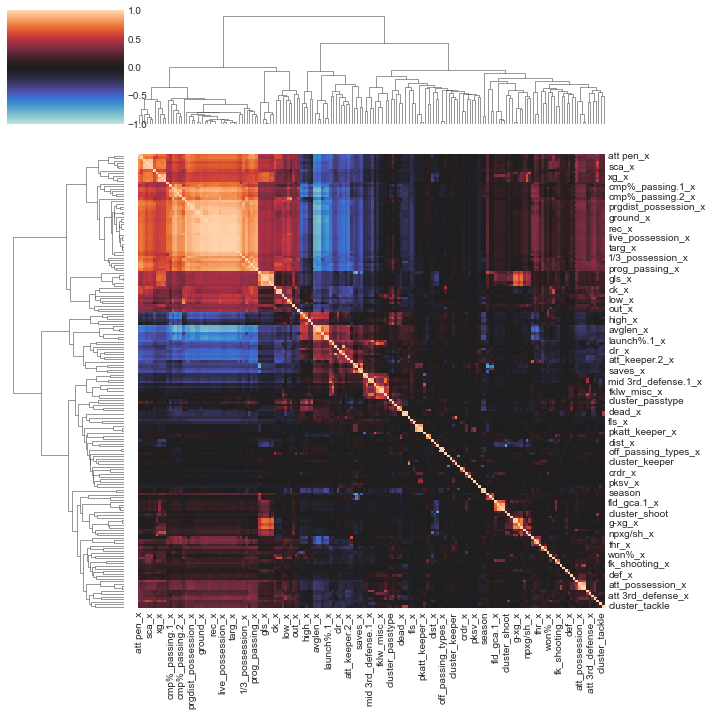

In [428]:
def corrplot(df, method="pearson", annot=True, **kwargs):
    sns.clustermap(
        df.corr(method),
#         metric='correlation',
        vmin=-1.0,
        vmax=1.0,
        cmap="icefire",
#         method="complete",
        annot=annot,
        **kwargs,
    )

col_x=[x for x in X if ((x[-1]!='y') and (x[-1]!='y') )]
cols=cluster_features_passingAll

[cols.append(x) for x in cluster_features_shootingAll]
cols
corrplot(X[col_x[::-1]], annot=None)




In [376]:

cluster_features_shootingAll = [
    "gls_x","sh_shooting_x",
    "sot_x","sot%_x","g/sh_x",
    "dist_x","pk_x","pkatt_shooting_x",
    'xg_x','npxg_x','npxg/sh_x','g-xg_x','np:g-xg_x'
]

cluster_features_keeperAll=[
    'sota_x','saves_x','save%_x','cs_x',
 'psxg_x','psxg+/-_x','pkatt_keeper_x','pka_x',
 'pksv_x','pkm_x','cmp_keeper_x','att_keeper_x','cmp%_keeper_x',
'cmp%_keeper_x','att_keeper.1_x','thr_x','launch%_x','avglen_x',
'att_keeper.2_x','launch%.1_x','avglen.1_x','opp_x','stp_x','stp%_x',
    '#opa_x','avgdist_x'
]

cluster_features_passingAll=[
 'cmp_passing_x',
 'att_passing_x',
 'cmp%_passing_x',
 'totdist_passing_x',
 'prgdist_passing_x',
 'cmp_passing.1_x',
 'att_passing.1_x',
 'cmp%_passing.1_x',
 'cmp_passing.2_x',
 'att_passing.2_x',
 'cmp%_passing.2_x',
 'cmp_passing.3_x',
 'att_passing.3_x',
 'cmp%_passing.3_x',
 'ast_x',
 'xa_x',
 'kp_x',
 '1/3_passing_x',
 'ppa_x',
 'crspa_x',
 'prog_passing_x']

cluster_features_passtypeAll=[
 'att_passing_types_x',
 'live_passing_types_x',
 'dead_x',
 'fk_passing_types_x',
 'tb_x',
 'press_passing_types_x',
 'sw_x',
 'crs_passing_types_x',
 'ck_x',
 'in_x',
 'out_x',
 'str_x',
 'ground_x',
 'low_x',
 'high_x',
 'left_x',
 'right_x',
 'head_x',
 'ti_x',
 'other_x',
 'cmp_passing_types_x',
 'off_passing_types_x',
 'out.1_x',
 'int_passing_types_x',
 'blocks_passing_types_x']

cluster_features_shotcreateAll=[
 'sca_x',
 'passlive_x',
 'passdead_x',
 'drib_x',
 'sh_gca_x',
 'fld_gca_x',
 'def_x',
 'gca_x',
 'passlive.1_x',
 'passdead.1_x',
 'drib.1_x',
 'sh_gca.1_x',
 'fld_gca.1_x',
 'def.1_x']

cluster_features_tackleAll=[
 'tkl_x',
 'tklw_defense_x',
 'def 3rd_defense_x',
 'mid 3rd_defense_x',
 'att 3rd_defense_x',
 'tkl.1_x',
 'att_defense_x',
 'tkl%_x',
 'past_x',
 'press_defense_x',
 'succ_defense_x',
 '%_x',
 'def 3rd_defense.1_x',
 'mid 3rd_defense.1_x',
 'att 3rd_defense.1_x',
 'blocks_defense_x',
 'sh_defense_x',
 'shsv_x',
 'pass_x',
 'int_defense_x',
 'clr_x',
 'err_x']

cluster_features_possessionAll=[
 'poss_x',
 'touches_x',
 'def pen_x',
 'def 3rd_possession_x',
 'mid 3rd_possession_x',
 'att 3rd_possession_x',
 'att pen_x',
 'live_possession_x',
 'succ_possession_x',
 'att_possession_x',
 'succ%_x',
 '#pl_x',
 'megs_x',
 'carries_x',
 'totdist_possession_x',
 'prgdist_possession_x',
 'prog_possession_x',
 '1/3_possession_x',
 'cpa_x',
 'mis_x',
 'dis_x',
 'targ_x',
 'rec_x',
 'rec%_x',
 'prog_possession.1_x']

cluster_features_miscAll=[
 'crdr_x',
 '2crdy_x',
 'fls_x',
 'fld_misc_x',
 'off_misc_x',
 'crs_misc_x',
 'int_misc_x',
 'tklw_misc_x',
 'pkwon_x',
 'pkcon_x',
 'og_x',
 'recov_x',
 'won_x',
 'lost_x',
 'won%_x']

def cluster_labels(df, features, n_clusters=20):
    X = df.copy()
    X_scaled = X.loc[:, features]
    X_scaled = (X_scaled - X_scaled.mean(axis=0)) / X_scaled.std(axis=0)
    kmeans = KMeans(n_clusters=n_clusters, n_init=50, random_state=0)
    X_new = pd.DataFrame()
    X_new["Cluster"] = kmeans.fit_predict(X_scaled)
    return X_new


def cluster_distance(df, features, n_clusters=20):
    X = df.copy()
    X_scaled = X.loc[:, features]
    X_scaled = (X_scaled - X_scaled.mean(axis=0)) / X_scaled.std(axis=0)
    kmeans = KMeans(n_clusters=20, n_init=50, random_state=0)
    X_cd = kmeans.fit_transform(X_scaled)
    # Label features and join to dataset
    X_cd = pd.DataFrame(
        X_cd, columns=[f"Centroid_{i}" for i in range(X_cd.shape[1])]
    )
    return X_cd



In [424]:
X['cluster_shoot'] =cluster_labels(X, cluster_features_shootingAll, n_clusters=10)
X['cluster_keeper'] =cluster_labels(X, cluster_features_keeperAll, n_clusters=10)

X['cluster_passing'] =cluster_labels(X, cluster_features_passingAll, n_clusters=10)
X['cluster_passtype'] =cluster_labels(X, cluster_features_passtypeAll, n_clusters=10)
X['cluster_shotcreate'] =cluster_labels(X, cluster_features_shotcreateAll, n_clusters=10)
X['cluster_tackle'] =cluster_labels(X, cluster_features_tackleAll, n_clusters=10)
X['cluster_possession'] =cluster_labels(X, cluster_features_possessionAll, n_clusters=10)
X['cluster_misc'] =cluster_labels(X, cluster_features_miscAll, n_clusters=10)




In [378]:
score_dataset(X, y)

# mean_absolute_error

0.8744429248631561

In [290]:
# cd = cluster_distance(X, cluster_features_keeperAll, n_clusters=20)
# cd

In [374]:
# a=0
# col_use=[]
# for cols in X.columns:
#     if a!=0:
#         col_use.append(cols)
#     elif cols=='crdr_x':
#         a=1
#         col_use.append(cols)
#     if cols=='prog_possession.1_x':
#         print(a)
#         a=0
# col_use
X

,round,day,venue_x,result_x,gf_x,ga_x,opponent_x,gls_x,sh_shooting_x,sot_x,...,crs_misc_y,int_misc_y,tklw_misc_y,pkwon_y,pkcon_y,og_y,recov_y,won_y,lost_y,won%_y
0,2,21,Home,2.000000,2.000000,0.000000,Everton,1.000000,14.000000,4.000000,...,12.000000,16.000000,9.000000,0.000000,0.000000,0.000000,101.000000,25.000000,26.000000,49.000000
1,2,20,Home,2.000000,2.000000,0.000000,Chelsea,2.000000,18.000000,6.000000,...,14.000000,9.000000,8.000000,0.000000,0.000000,0.000000,92.000000,21.000000,31.000000,40.400000
2,2,19,Home,0.000000,3.000000,3.000000,Crystal Palace,3.000000,13.000000,4.000000,...,13.000000,21.000000,13.000000,0.000000,0.000000,1.000000,100.000000,19.000000,19.000000,50.000000
3,2,20,Away,-1.000000,2.000000,3.000000,Tottenham Hotspur,2.000000,19.000000,6.000000,...,14.000000,17.000000,6.000000,0.000000,0.000000,0.000000,75.000000,21.000000,19.000000,52.500000
4,2,19,Away,1.000000,4.000000,3.000000,Stoke City,4.000000,27.000000,10.000000,...,9.000000,25.000000,12.000000,0.000000,0.000000,0.000000,91.000000,26.000000,25.000000,51.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3755,38,22,Away,0.333333,1.666667,1.333333,Arsenal,1.666667,9.333333,4.000000,...,11.666667,10.000000,9.666667,0.000000,0.000000,0.333333,74.333333,14.666667,16.666667,46.466667
3756,38,22,Away,-1.666667,0.666667,2.333333,Brentford,0.666667,9.666667,2.333333,...,19.333333,11.666667,6.666667,0.000000,0.666667,0.000000,80.333333,15.333333,15.666667,48.333333
3757,38,22,Home,-0.666667,1.000000,1.666667,Newcastle United,1.000000,13.000000,4.333333,...,11.000000,14.666667,13.000000,0.000000,0.000000,0.000000,64.333333,20.000000,19.000000,48.766667
3758,38,22,Away,-2.000000,0.666667,2.666667,Chelsea,0.333333,10.666667,2.666667,...,18.666667,11.666667,11.666667,0.333333,0.000000,0.000000,88.000000,17.666667,13.666667,57.066667


In [264]:
Xt=X.groupby(['team_x','season']).mean().reset_index()

clt =cluster_labels(Xt, cluster_features_shootingAll, n_clusters=7)

Xt['cluster']=clt


In [ ]:
[(x, Xt.loc[( (Xt.cluster==x) & (Xt.season==2020) ),'team_x'].values ) for x in Xt['cluster'].unique()]

In [283]:
Xt=X.groupby(['team_x','season']).mean().reset_index()

clt =cluster_labels(Xt, cluster_features_keeperAll, n_clusters=7)

Xt['cluster']=clt


In [284]:
[(x, Xt.loc[( (Xt.cluster==x) & (Xt.season==2021) ),'team_x'].values ) for x in Xt['cluster'].unique()]

[(2,
  array(['Arsenal', 'Brighton and Hove Albion', 'Crystal Palace'],
        dtype=object)),
 (6,
  array(['Brentford', 'Leeds United', 'Leicester City', 'Norwich City',
         'Wolverhampton Wanderers'], dtype=object)),
 (5,
  array(['Newcastle United', 'Southampton', 'West Ham United'], dtype=object)),
 (1,
  array(['Aston Villa', 'Chelsea', 'Manchester United', 'Tottenham Hotspur'],
        dtype=object)),
 (0, array([], dtype=object)),
 (4, array(['Burnley', 'Everton', 'Watford'], dtype=object)),
 (3, array(['Liverpool', 'Manchester City'], dtype=object))]

In [286]:
# Xy = X.copy()
# Xy["Cluster"] = cl.astype("category")
# Xy["XX"] = y
# sns.relplot(
#     x="value", y="XX", hue="Cluster", col="variable",
#     height=4, aspect=1, facet_kws={'sharex': False}, col_wrap=3,
#     data=Xy.melt(
#         value_vars=cluster_features, id_vars=["XX", "Cluster"],
#     ),
# );

In [287]:
# Xy[['team_x','Cluster','XX']]
# # np.shape(X),np.shape(Xy)

# sns.histplot(Xy.loc[Xy.team_x=="Manchester City"].XX,fill=False)
# sns.histplot(Xy.loc[Xy.team_x=="Manchester United"].XX,fill=False)
# sns.histplot(Xy.loc[Xy.team_x=="Newcastle United"].XX,fill=False)



In [288]:
# # # sns.histplot(Xy, x="team_x", y="Cluster")

# # Xyy=Xy[['team_x','Cluster','XX']]
# # # dfAll['team_x'].unique()

# # Xyyy=Xyy.groupby(by=['team_x','Cluster']).count()

# sns.histplot(Xt, x="team_x", y="cluster",cbar=True)

In [289]:
# # Xyyy.droplevel(level=0)
# Xyyy.loc['Arsenal']
# # .median(level=0,axis=0)

# sns.histplot(Xyyy.loc['Arsenal'])
# Xyyy.loc['Arsenal']